Plot saved as district1_ho_chi_minh_road_network.png


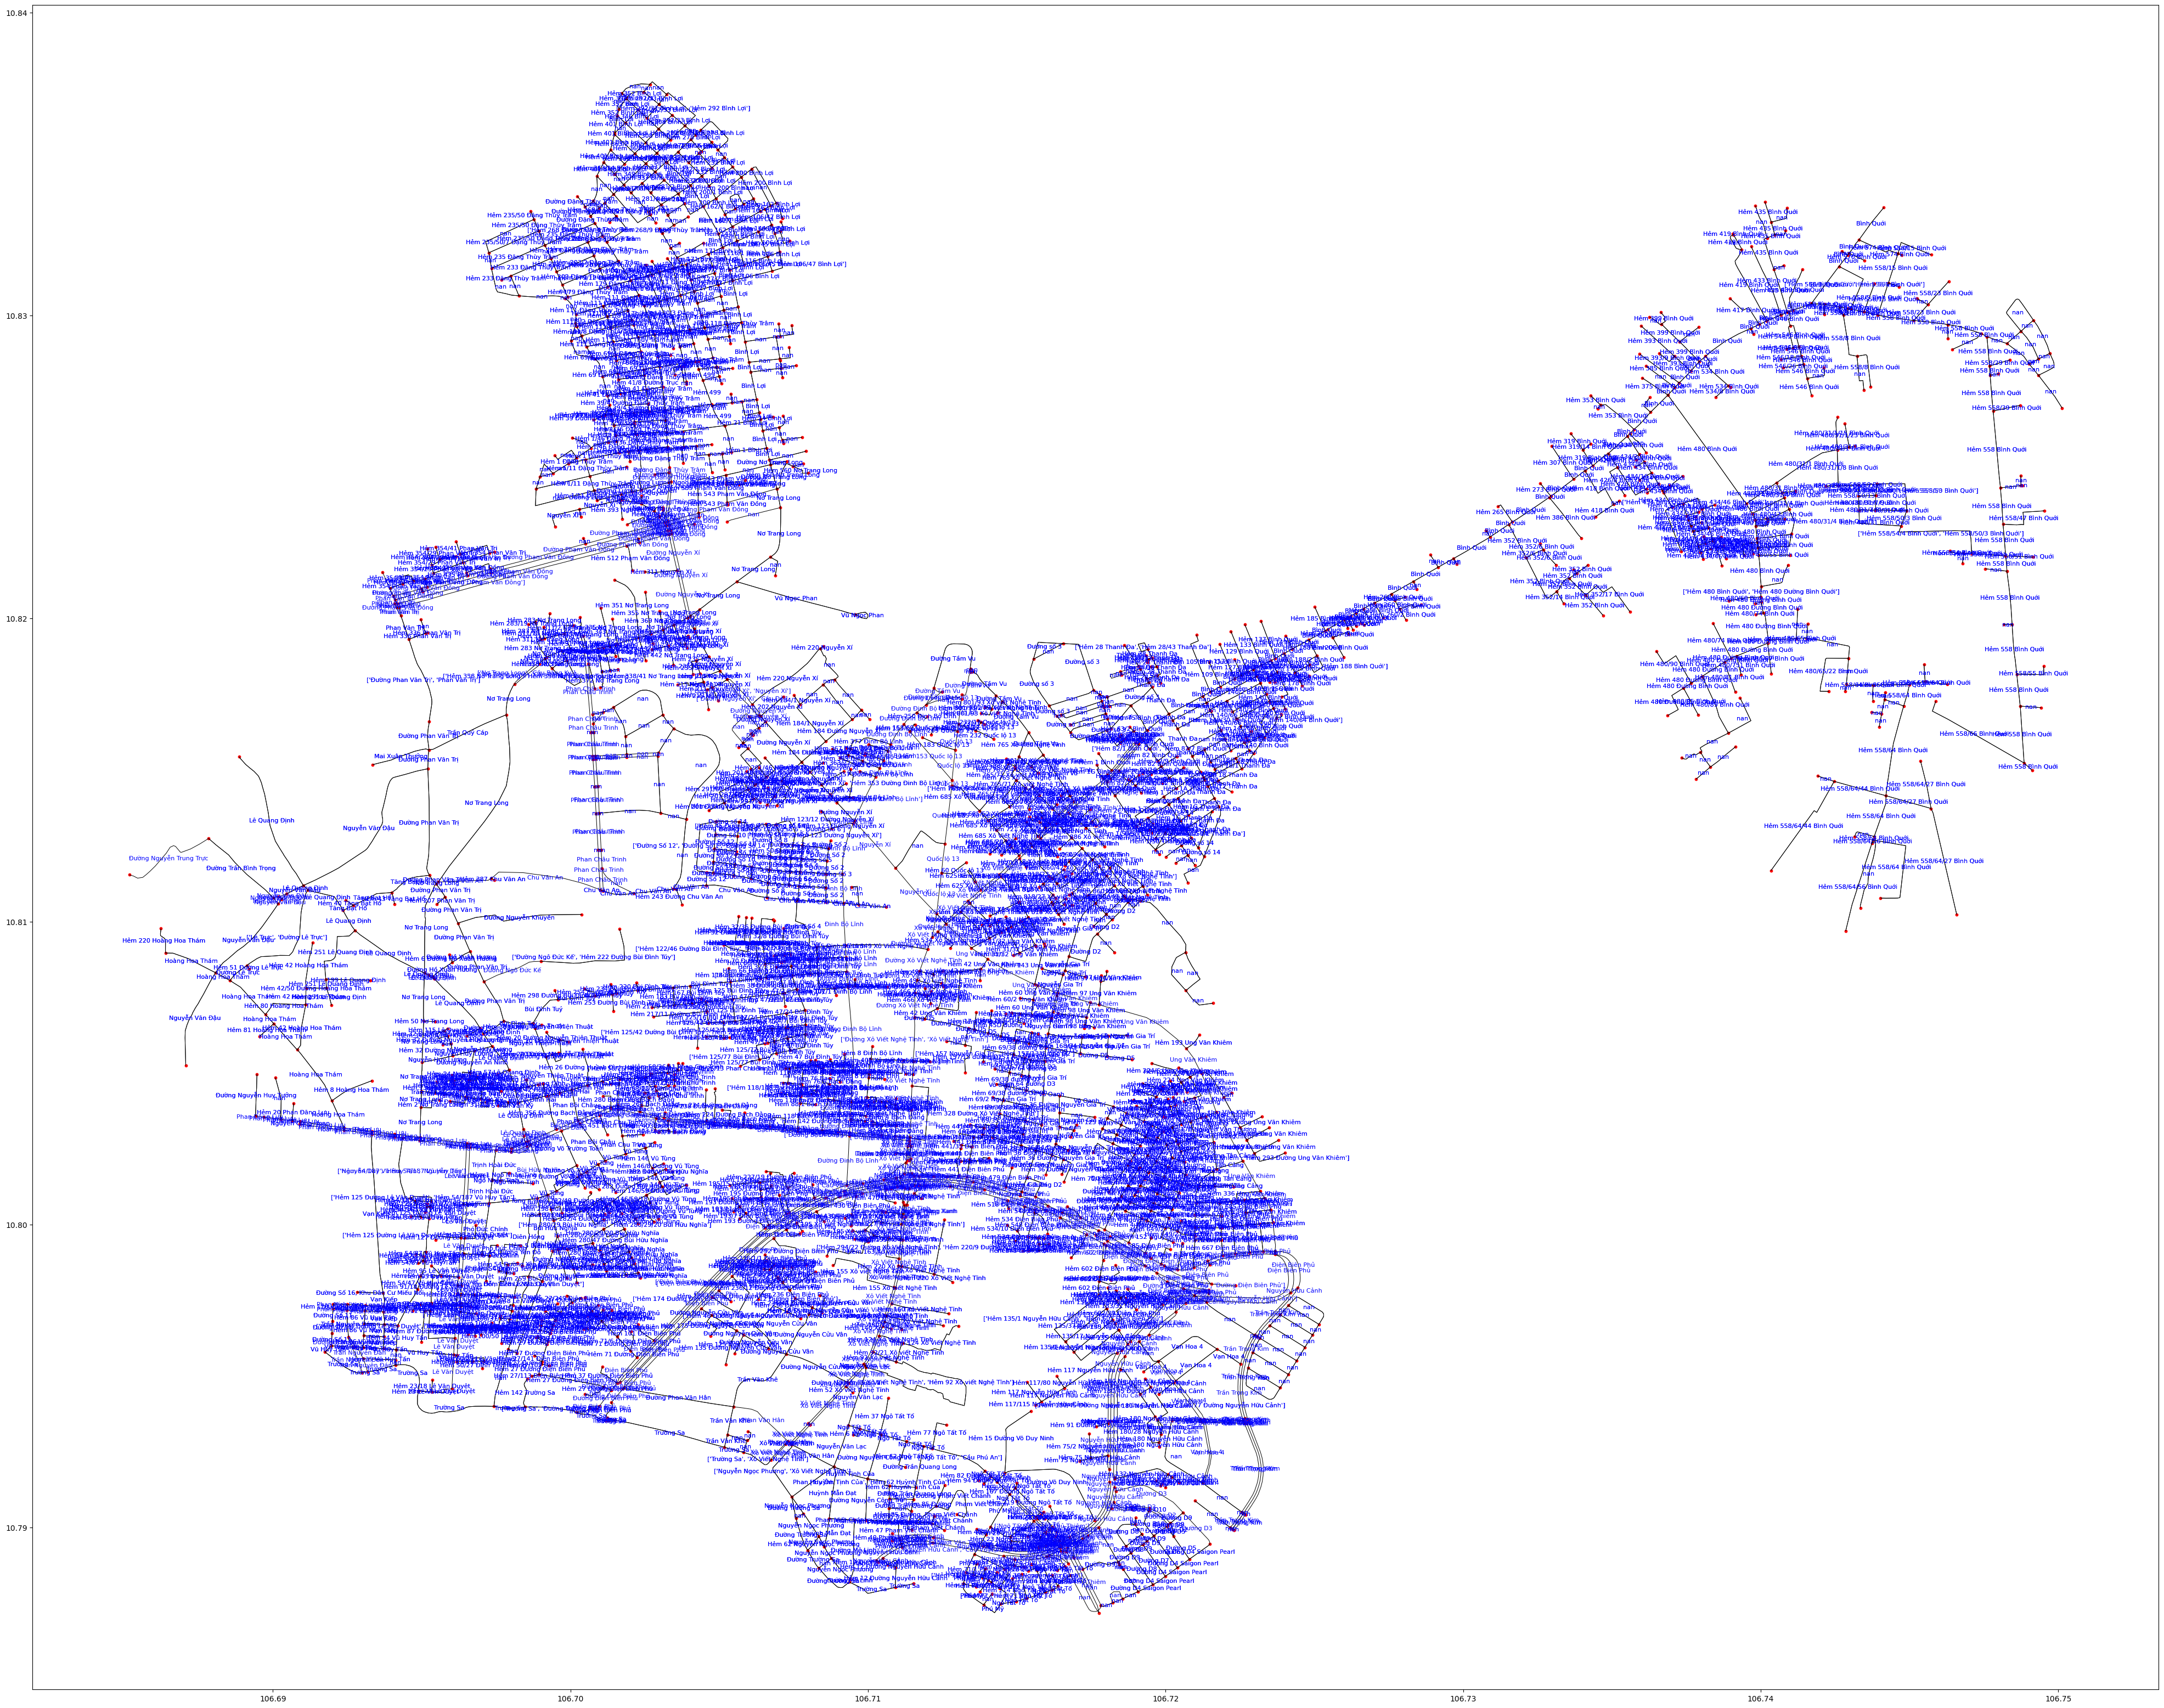

In [12]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define area of interest
place_name = "District Binh Thanh, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Convert the graph to GeoDataFrames for nodes and edges
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Set up the plot with a larger figsize
fig, ax = plt.subplots(figsize=(50, 50))  # Increase the figsize here for a bigger plot
edges.plot(ax=ax, linewidth=0.7, edgecolor="black")  # Plot the edges (roads)
nodes.plot(ax=ax, markersize=10, color="red")  # Plot the nodes (intersections)

# Add street names
for _, edge in edges.iterrows():
    if 'name' in edge:  # Check if the edge has a 'name' attribute
        x = edge.geometry.centroid.x
        y = edge.geometry.centroid.y
        street_name = edge['name']
        ax.text(x, y, street_name, fontsize=8, color='blue', ha='center', va='center')

# Save the plot to a file
output_file = "district1_ho_chi_minh_road_network.png"
plt.savefig(output_file, dpi=300, bbox_inches="tight")  # Save with high resolution

print(f"Plot saved as {output_file}")


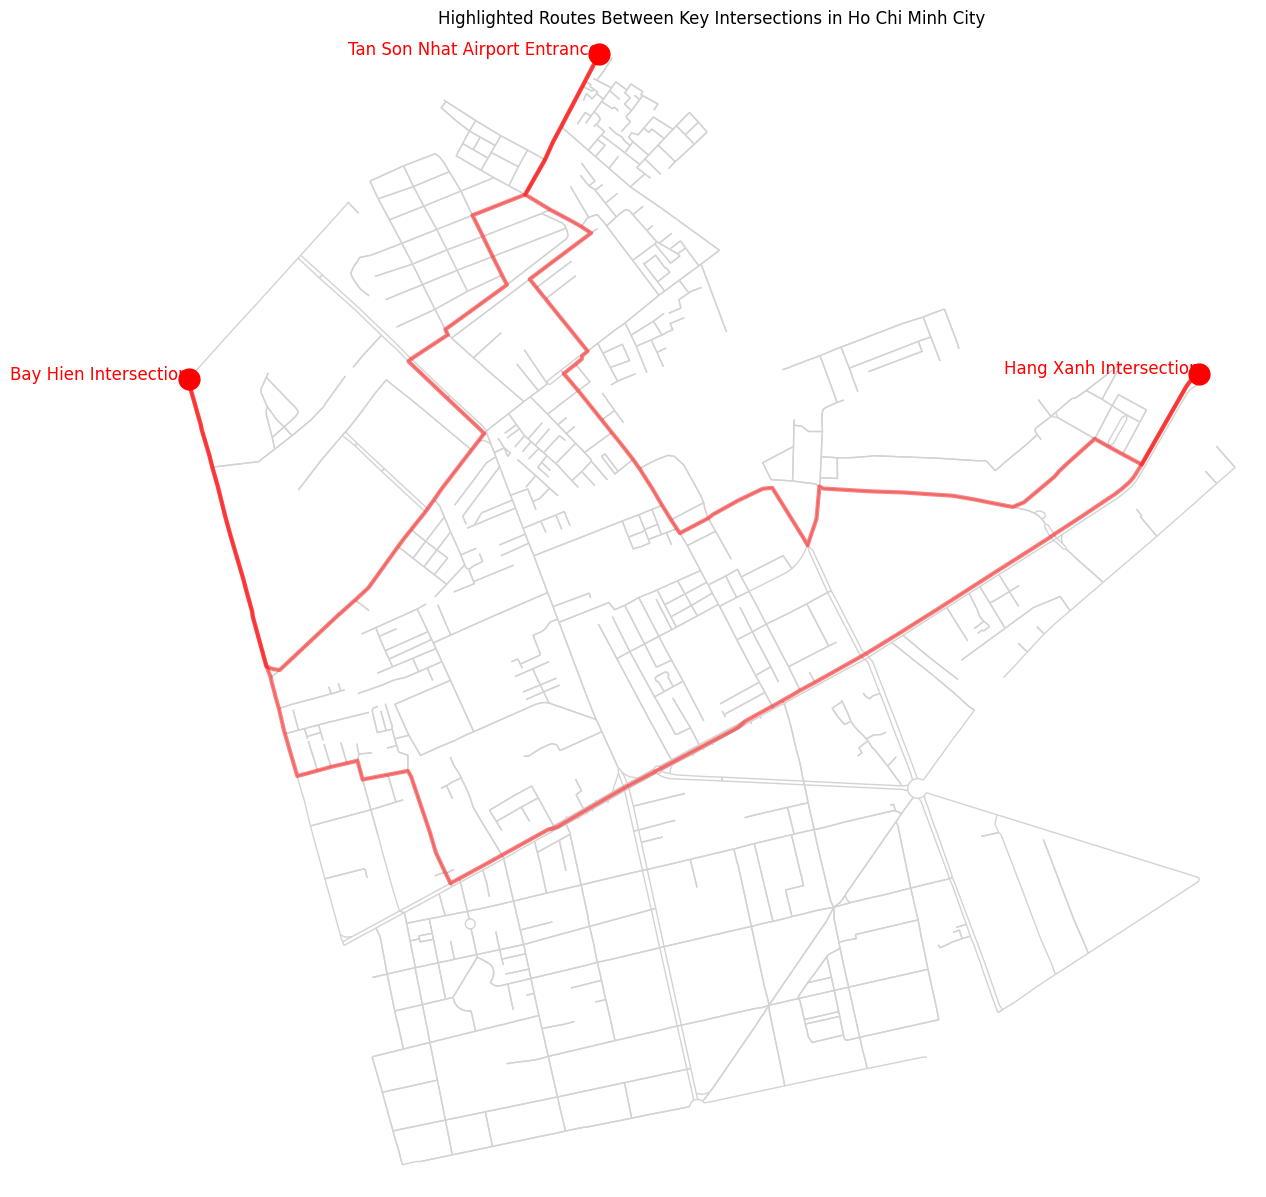

In [15]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define the area of interest
place_name = "District 10,Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Define the coordinates of the main intersections
locations = {
    "Hang Xanh Intersection": (10.802723, 106.711239),
    "Tan Son Nhat Airport Entrance": (10.818644, 106.658583),
    "Bay Hien Intersection": (10.783273, 106.652324),
}

# Find the nearest node to each location in the graph
nodes = {name: ox.distance.nearest_nodes(graph, lng, lat) for name, (lat, lng) in locations.items()}

# Find shortest paths between each pair of locations
routes = [
    nx.shortest_path(graph, nodes["Hang Xanh Intersection"], nodes["Tan Son Nhat Airport Entrance"], weight="length"),
    nx.shortest_path(graph, nodes["Tan Son Nhat Airport Entrance"], nodes["Bay Hien Intersection"], weight="length"),
    nx.shortest_path(graph, nodes["Hang Xanh Intersection"], nodes["Bay Hien Intersection"], weight="length")
]

# Plot the full network, highlighting the routes connecting the specified locations
fig, ax = plt.subplots(figsize=(15, 15))
# Plot the base road network in light gray
ox.plot_graph(graph, ax=ax, show=False, close=False, edge_color="lightgray", node_size=0)

# Plot each route in a distinct color
route_colors = ['blue', 'green', 'purple']
for route, color in zip(routes, route_colors):
    ox.plot_graph_route(graph, route, route_linewidth=3, node_size=0, edge_color=color, ax=ax, show=False, close=False)

# Mark the main locations with red dots and labels
for name, node in nodes.items():
    x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
    ax.plot(x, y, 'ro', markersize=15)
    ax.text(x, y, name, fontsize=12, ha='right', color='red')

plt.title("Highlighted Routes Between Key Intersections in Ho Chi Minh City")
plt.show()



Route 1 details:
Street Name: Đường 3 Tháng 2, Width: nan, Length: 294.52799999999996 meters
Street Name: Đường Số 2, Width: nan, Length: 59.08 meters
Street Name: Đường Số 2, Width: nan, Length: 44.627 meters
Street Name: Đường Số 2, Width: nan, Length: 42.228 meters
Street Name: Đường Số 1, Width: nan, Length: 292.854 meters
Street Name: Cao Thắng, Width: nan, Length: 532.507 meters
Street Name: Hoàng Dư Khương, Width: nan, Length: 164.434 meters
Street Name: Đường nội bộ Kỳ Hòa, Width: nan, Length: 379.663 meters
Street Name: Hẻm 796 Sư Vạn Hạnh, Width: nan, Length: 87.393 meters
Street Name: Đường Sư Vạn Hạnh, Width: nan, Length: 14.688 meters
Street Name: Đường Sư Vạn Hạnh, Width: nan, Length: 29.072 meters
Street Name: Sư Vạn Hạnh, Width: nan, Length: 46.406 meters
Street Name: Sư Vạn Hạnh, Width: nan, Length: 117.47200000000001 meters
Street Name: Sư Vạn Hạnh, Width: nan, Length: 30.935 meters
Street Name: Sư Vạn Hạnh, Width: nan, Length: 93.49 meters
Street Name: Sư Vạn Hạnh, 

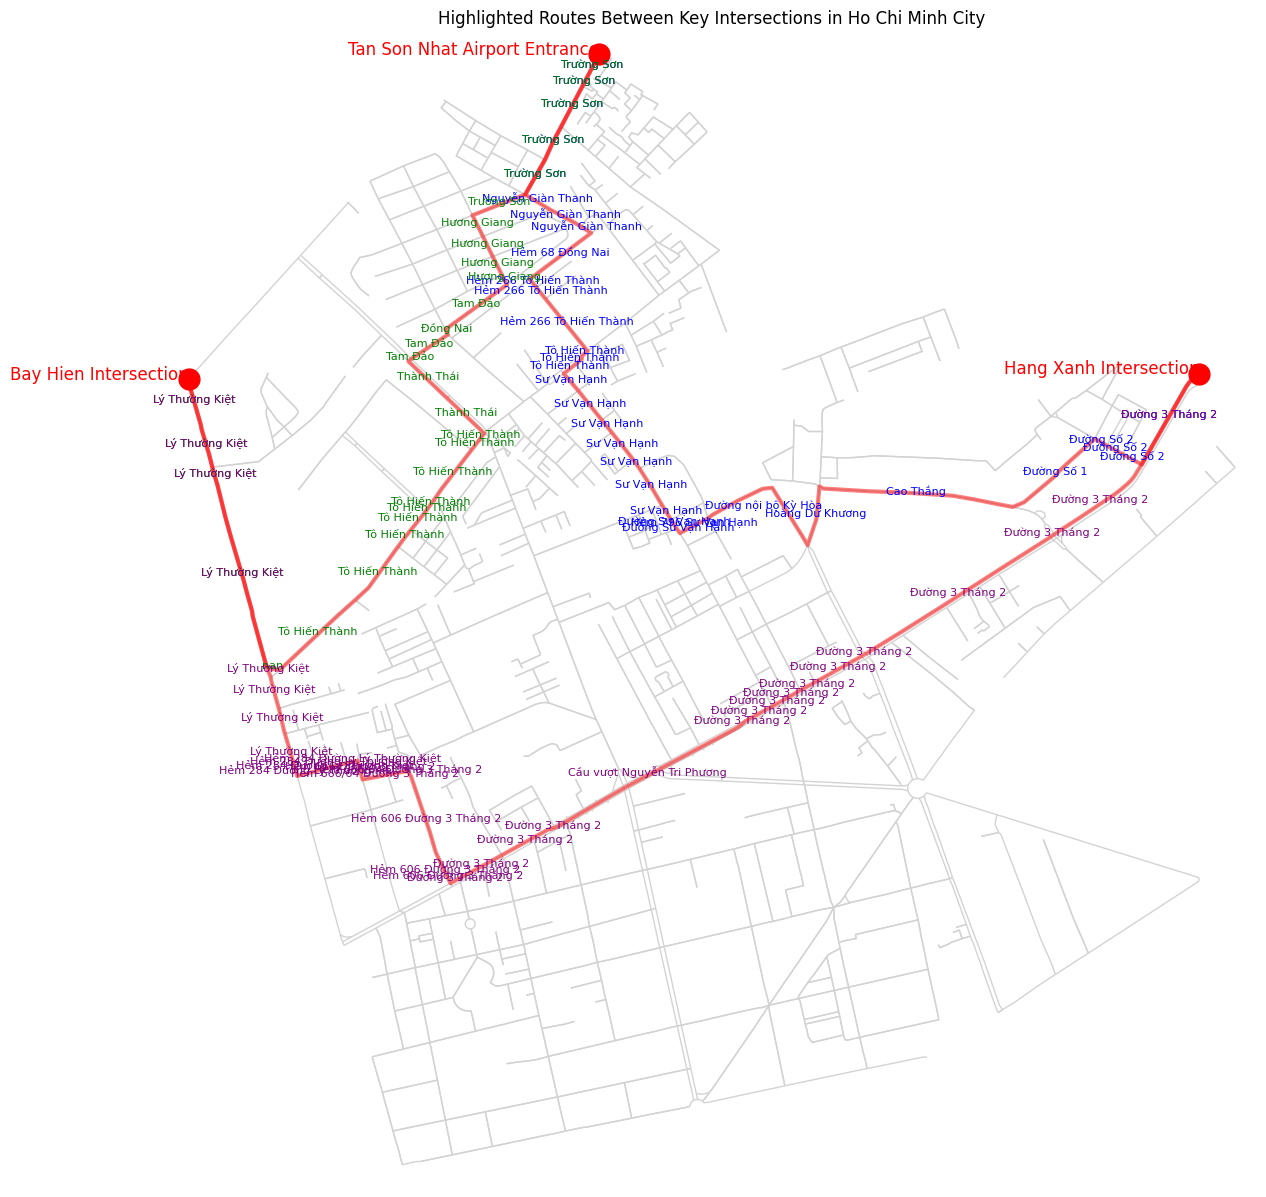

In [16]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define the area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Define the coordinates of the main intersections
locations = {
    "Hang Xanh Intersection": (10.802723, 106.711239),
    "Tan Son Nhat Airport Entrance": (10.818644, 106.658583),
    "Bay Hien Intersection": (10.783273, 106.652324),
}

# Find the nearest node to each location in the graph
nodes = {name: ox.distance.nearest_nodes(graph, lng, lat) for name, (lat, lng) in locations.items()}

# Find shortest paths between each pair of locations
routes = [
    nx.shortest_path(graph, nodes["Hang Xanh Intersection"], nodes["Tan Son Nhat Airport Entrance"], weight="length"),
    nx.shortest_path(graph, nodes["Tan Son Nhat Airport Entrance"], nodes["Bay Hien Intersection"], weight="length"),
    nx.shortest_path(graph, nodes["Hang Xanh Intersection"], nodes["Bay Hien Intersection"], weight="length")
]

# Convert the graph to GeoDataFrames
nodes_gdf, edges_gdf = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Extract and print details for each route
for i, route in enumerate(routes, start=1):
    print(f"\nRoute {i} details:")
    for u, v in zip(route[:-1], route[1:]):
        edge = edges_gdf.loc[(u, v, 0)]  # Select the edge by node pair (u, v)
        street_name = edge.get("name", "Unnamed street")
        street_width = edge.get("width", "Unknown width")
        street_length = edge["length"]
        print(f"Street Name: {street_name}, Width: {street_width}, Length: {street_length} meters")

# Plot the full network, highlighting the routes connecting the specified locations
fig, ax = plt.subplots(figsize=(15, 15))
# Plot the base road network in light gray
ox.plot_graph(graph, ax=ax, show=False, close=False, edge_color="lightgray", node_size=0)

# Plot each route in a distinct color and label street names
route_colors = ['blue', 'green', 'purple']
for route, color in zip(routes, route_colors):
    ox.plot_graph_route(graph, route, route_linewidth=3, node_size=0, edge_color=color, ax=ax, show=False, close=False)
    # Add street names for each segment in the route
    for u, v in zip(route[:-1], route[1:]):
        edge = edges_gdf.loc[(u, v, 0)]
        street_name = edge.get("name", "Unnamed street")
        if street_name != "Unnamed street":  # Avoid labeling unnamed streets
            x, y = edge.geometry.centroid.x, edge.geometry.centroid.y
            ax.text(x, y, street_name, fontsize=8, color=color, ha="center")

# Mark the main locations with red dots and labels
for name, node in nodes.items():
    x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
    ax.plot(x, y, 'ro', markersize=15)
    ax.text(x, y, name, fontsize=12, ha='right', color='red')

plt.title("Highlighted Routes Between Key Intersections in Ho Chi Minh City")
plt.show()


In [23]:
import osmnx as ox
import pandas as pd

# Define the area of interest and load the full road network
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Convert the graph to GeoDataFrames for easier manipulation and plotting
nodes_gdf, edges_gdf = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Export nodes and edges to CSV
nodes_csv = "district10_nodes.csv"
edges_csv = "district10_edges.csv"
nodes_gdf.to_csv(nodes_csv, index=False)
edges_gdf.to_csv(edges_csv, index=False)
print(f"Nodes data saved to {nodes_csv}")
print(f"Edges data saved to {edges_csv}")



Nodes data saved to district10_nodes.csv
Edges data saved to district10_edges.csv


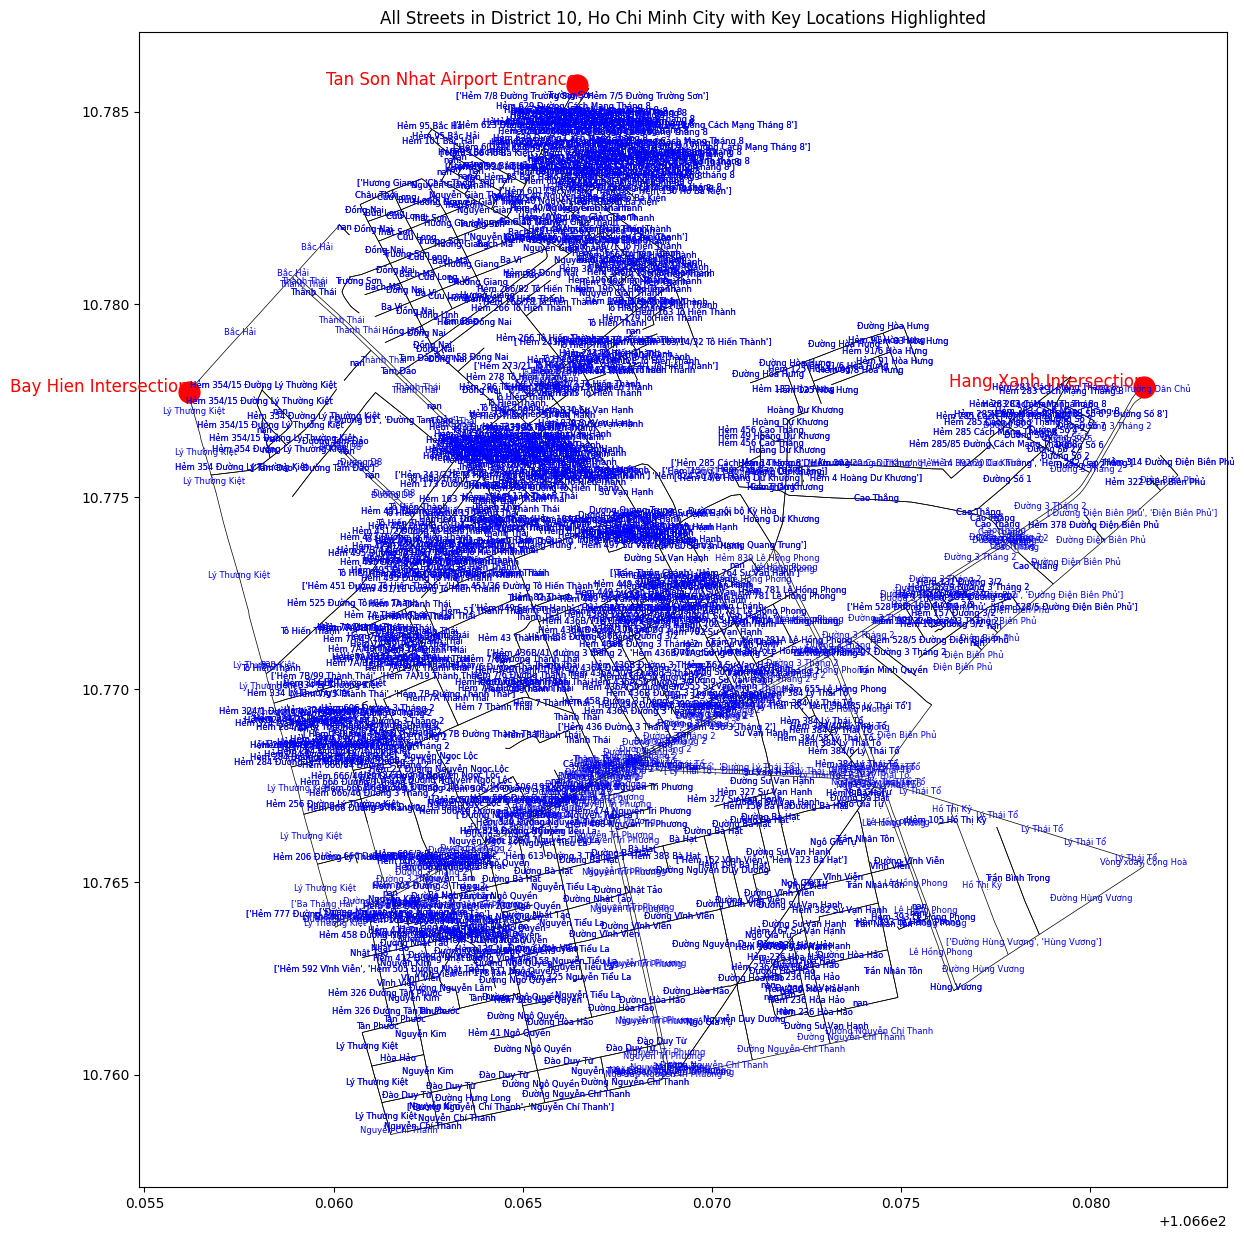

In [26]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define the area of interest (slightly expanded to cover the key locations)
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Define coordinates for the three main locations
locations = {
    "Hang Xanh Intersection": (10.802723, 106.711239),
    "Tan Son Nhat Airport Entrance": (10.818644, 106.658583),
    "Bay Hien Intersection": (10.783273, 106.652324),
}

# Find the nearest node to each location in the graph
nodes = {name: ox.distance.nearest_nodes(graph, lng, lat) for name, (lat, lng) in locations.items()}

# Convert the graph to GeoDataFrames for easier manipulation and plotting
nodes_gdf, edges_gdf = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Plot the entire road network with street names labeled
fig, ax = plt.subplots(figsize=(15, 15))
edges_gdf.plot(ax=ax, linewidth=0.5, edgecolor="black")  # Plot edges (roads)

# Add street names to the plot
for _, edge in edges_gdf.iterrows():
    if 'name' in edge and edge['name'] is not None:  # Check if the edge has a 'name' attribute
        x, y = edge.geometry.centroid.x, edge.geometry.centroid.y
        ax.text(x, y, edge['name'], fontsize=6, color='blue', ha='center')

# Mark the three specific locations with red dots and labels
for name, node in nodes.items():
    x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
    ax.plot(x, y, 'ro', markersize=15)
    ax.text(x, y, name, fontsize=12, ha='right', color='red')

plt.title("All Streets in District 10, Ho Chi Minh City with Key Locations Highlighted")
plt.show()


In [ ]:
import osmnx as ox
import networkx as nx
import random
from geopy.geocoders import Nominatim

# Load the graph for the area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")
graph = nx.DiGraph(graph)  # Convert to directed graph if necessary


# Define source and sink locations as strings
source_location = "Tô Hiến Thành, Ho Chi Minh City"
sink_location = "Hẻm 236 Hòa Hảo, Ho Chi Minh City"




# Assign random capacities to each edge
for u, v, data in graph.edges(data=True):
    data['capacity'] = random.randint(1, 10)  # Random capacity between 1 and 10

# Compute the maximum flow
flow_value, flow_dict = nx.maximum_flow(graph, source_node, sink_node, capacity='capacity')

print(f"Max flow from {source_location} to {sink_location}: {flow_value}")
print("Flow details per edge:", flow_dict)


GeocoderInsufficientPrivileges: Non-successful status code 403

In [4]:
import osmnx as ox
import networkx as nx
import random

# Optional: Increase the default timeout and retries for OSMnx operations
ox.config(use_cache=True, log_console=True)

# Define the area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"

# Load the graph for the specified area
print("Loading graph for:", place_name)
graph = ox.graph_from_place(place_name, network_type="drive")
graph = graph.to_directed()  # Ensure the graph is directed

# Define source and sink locations as address strings
source_location = "Tô Hiến Thành, Ho Chi Minh City"
sink_location = "Hẻm 236 Hòa Hảo, Ho Chi Minh City"

# Geocode the source and sink locations using OSMnx's built-in geocoder
print("\nGeocoding locations...")
source_coords = ox.geocode(source_location)
sink_coords = ox.geocode(sink_location)

print(f"Source coordinates: {source_coords}")
print(f"Sink coordinates: {sink_coords}")

# Find the nearest nodes in the graph to the geocoded coordinates
print("\nFinding nearest nodes in the graph...")
source_node = ox.nearest_nodes(graph, X=source_coords[1], Y=source_coords[0])
sink_node = ox.nearest_nodes(graph, X=sink_coords[1], Y=sink_coords[0])

print(f"Source node ID: {source_node}")
print(f"Sink node ID: {sink_node}")

# Assign random capacities to each edge (for demonstration purposes)
print("\nAssigning random capacities to edges...")
for u, v, data in graph.edges(data=True):
    data['capacity'] = random.randint(1, 10)  # Capacity between 1 and 10

# Compute the maximum flow from source to sink
print("\nComputing maximum flow...")
flow_value, flow_dict = nx.maximum_flow(graph, source_node, sink_node, capacity='capacity')

print(f"\nMaximum flow from '{source_location}' to '{sink_location}': {flow_value}")

# Function to convert node IDs to readable coordinates
def node_to_coords(G, node_id):
    node = G.nodes[node_id]
    return (node['y'], node['x'])  # (latitude, longitude)

# Display flow details for edges with positive flow
print("\nFlow details per edge:")
for u, flows in flow_dict.items():
    for v, flow in flows.items():
        if flow > 0:
            u_coords = node_to_coords(graph, u)
            v_coords = node_to_coords(graph, v)
            print(f"From {u} ({u_coords}) to {v} ({v_coords}): Flow = {flow}")

# (Optional) Display source and sink node coordinates
source_node_coords = node_to_coords(graph, source_node)
sink_node_coords = node_to_coords(graph, sink_node)

print(f"\nSource node ID: {source_node}")
print(f"Source node coordinates: {source_node_coords}")

print(f"Sink node ID: {sink_node}")
print(f"Sink node coordinates: {sink_node_coords}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_14140\254387767.py:6: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


Loading graph for: District 10, Ho Chi Minh City, Vietnam

Geocoding locations...
Source coordinates: (10.7763228, 106.6634969)
Sink coordinates: (10.762914, 106.6716359)

Finding nearest nodes in the graph...
Source node ID: 9843908828
Sink node ID: 5050082243

Assigning random capacities to edges...

Computing maximum flow...


NetworkXError: MultiGraph and MultiDiGraph not supported (yet).

In [20]:
import osmnx as ox
import networkx as nx

# Optional: Configure osmnx settings for better performance and logging
ox.config(log_console=True, use_cache=True)

# Define the place of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"

# Load the road network graph for driving
graph = ox.graph_from_place(place_name, network_type="drive")


C:\Users\Admin\AppData\Local\Temp\ipykernel_14140\383321265.py:5: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(log_console=True, use_cache=True)


In [ ]:
# Function to check if 'Sư Vạn Hạnh' is in the 'name' attribute
def is_su_van_hanh(name):
    if isinstance(name, list):
        return "Sư Vạn Hạnh" in name
    elif isinstance(name, str):
        return "Sư Vạn Hạnh" == name
    return False

# Filter edges with the name "Sư Vạn Hạnh"
su_van_hanh_edges = [
    (u, v, key, data) 
    for u, v, key, data in graph.edges(keys=True, data=True) 
    if 'name' in data and is_su_van_hanh(data['name'])
]
# Extract all nodes connected to edges with the name "Sư Vạn Hạnh"
su_van_hanh_nodes = set()
for u, v, key, data in su_van_hanh_edges:
    su_van_hanh_nodes.add(u)
    su_van_hanh_nodes.add(v)

# Print all node information for nodes related to edges named "Sư Vạn Hạnh"
for node in su_van_hanh_nodes:
    print(f"Node {node}: {graph.nodes[node]}")

print(f"Found {len(su_van_hanh_edges)} edge(s) named 'Sư Vạn Hạnh'.")
for u, v, key, data in su_van_hanh_edges:
    print(f"Edge from {u} to {v} (key: {key}): {data}")


Node 2433276952: {'y': 10.7697582, 'x': 106.6710494, 'street_count': 4}
Node 3718387359: {'y': 10.7767238, 'x': 106.6664893, 'street_count': 3}
Node 5764945075: {'y': 10.7755289, 'x': 106.6674337, 'street_count': 3}
Node 6346444986: {'y': 10.7696326, 'x': 106.67078, 'street_count': 3}
Node 366454460: {'y': 10.7746295, 'x': 106.6679976, 'street_count': 3}
Node 2498090051: {'y': 10.7678613, 'x': 106.6715256, 'street_count': 4}
Node 366412106: {'y': 10.7677675, 'x': 106.6715514, 'street_count': 4}
Node 11235648971: {'y': 10.7721981, 'x': 106.6694053, 'street_count': 3}
Node 4629145035: {'y': 10.769836, 'x': 106.6710041, 'street_count': 3}
Node 2690659787: {'y': 10.7774435, 'x': 106.6659013, 'street_count': 4}
Node 3301809364: {'y': 10.7696953, 'x': 106.6707494, 'street_count': 4}
Node 6728906454: {'y': 10.777861, 'x': 106.6655403, 'highway': 'traffic_signals', 'street_count': 4}
Node 366428890: {'y': 10.7757564, 'x': 106.6672707, 'street_count': 3}
Node 1524484193: {'y': 10.7721496, 'x': 

Node 5765078843: {'y': 10.7750979, 'x': 106.6568946, 'street_count': 3}
Node 366386566: {'y': 10.7610932, 'x': 106.660752, 'street_count': 4}
Node 11932199879: {'y': 10.7706861, 'x': 106.6581084, 'street_count': 3}
Node 4628119689: {'y': 10.7679844, 'x': 106.6588816, 'street_count': 4}
Node 2498077593: {'y': 10.7777193, 'x': 106.6561674, 'street_count': 4}
Node 366466362: {'y': 10.7755656, 'x': 106.6567588, 'street_count': 4}
Node 5073779404: {'y': 10.7696432, 'x': 106.6584219, 'street_count': 3}
Node 2302073743: {'y': 10.7638243, 'x': 106.6600501, 'street_count': 4}
Node 5073779440: {'y': 10.7654627, 'x': 106.6595725, 'street_count': 3}
Node 6754155665: {'y': 10.7602245, 'x': 106.661006, 'street_count': 4}
Node 2302073746: {'y': 10.776594, 'x': 106.6564739, 'street_count': 3}
Node 2302073747: {'y': 10.7584427, 'x': 106.6615092, 'street_count': 4}
Node 2302073721: {'y': 10.7690214, 'x': 106.6585721, 'street_count': 4}
Node 366397786: {'y': 10.7592718, 'x': 106.6612746, 'street_count': 

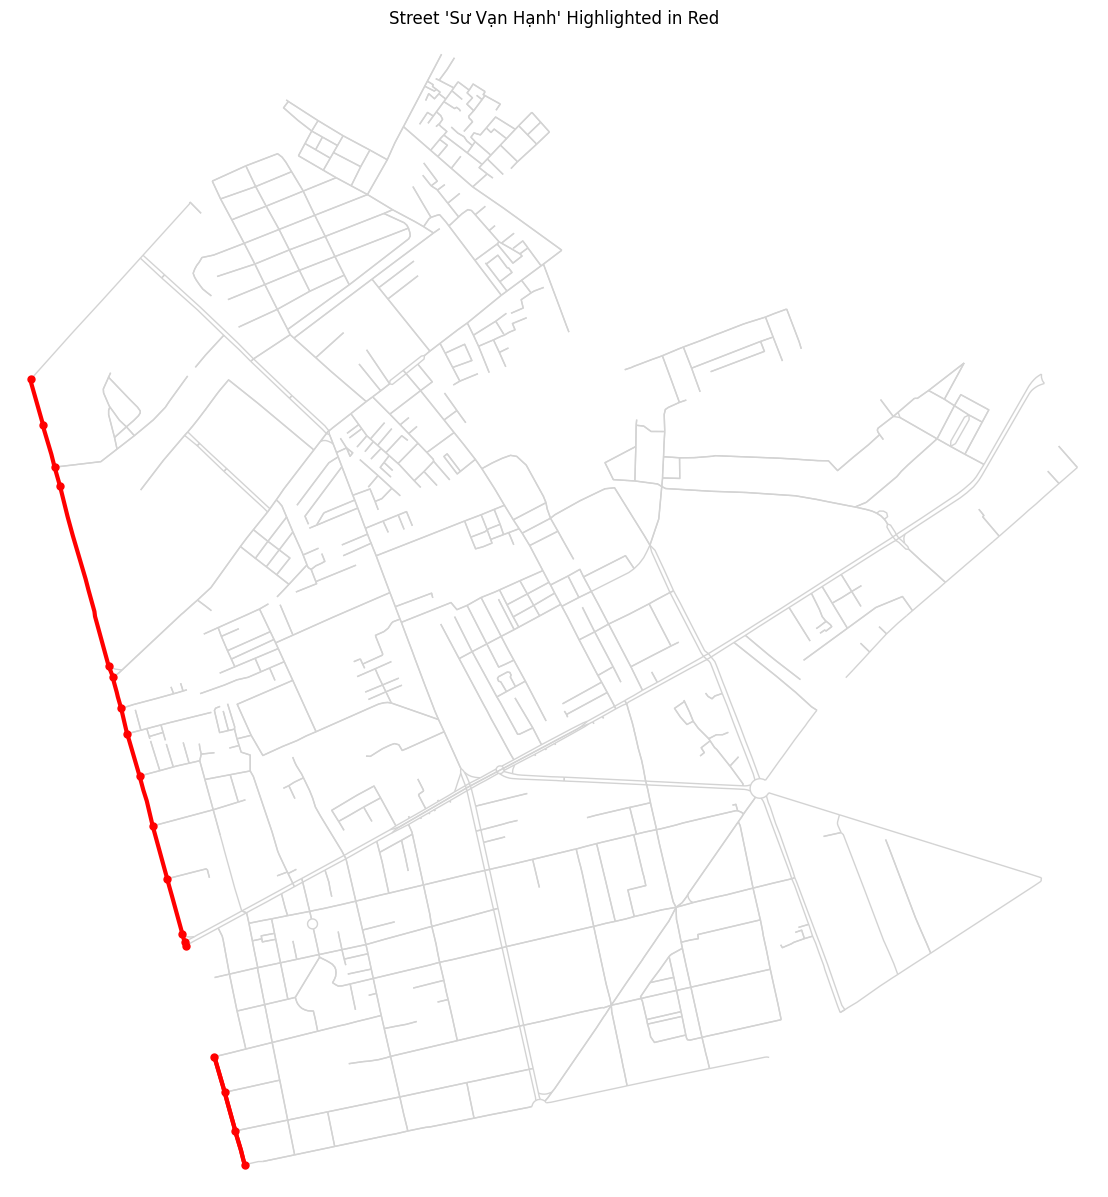

In [23]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Function to check if 'Sư Vạn Hạnh' is in the 'name' attribute
def is_su_van_hanh(name):
    if isinstance(name, list):
        return "Lý Thường Kiệt" in name
    elif isinstance(name, str):
        return "Lý Thường Kiệt" == name
    return False

# Filter edges with the name "Sư Vạn Hạnh"
su_van_hanh_edges = [
    (u, v, key, data) 
    for u, v, key, data in graph.edges(keys=True, data=True) 
    if 'name' in data and is_su_van_hanh(data['name'])
]

# Extract all nodes connected to edges with the name "Sư Vạn Hạnh"
su_van_hanh_nodes = set()
for u, v, key, data in su_van_hanh_edges:
    su_van_hanh_nodes.add(u)
    su_van_hanh_nodes.add(v)

# Print all node information for nodes related to edges named "Sư Vạn Hạnh"
for node in su_van_hanh_nodes:
    print(f"Node {node}: {graph.nodes[node]}")

print(f"Found {len(su_van_hanh_edges)} edge(s) named 'Sư Vạn Hạnh'.")
for u, v, key, data in su_van_hanh_edges:
    print(f"Edge from {u} to {v} (key: {key}): {data}")

# Plot the street "Sư Vạn Hạnh" in red
# Get the street network data in GeoDataFrame format
gdf_edges = ox.graph_to_gdfs(graph, edges=True, nodes=False)

# Filter for edges that match "Sư Vạn Hạnh"
su_van_hanh_street = gdf_edges[gdf_edges['name'] == "Lý Thường Kiệt"]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the full network in light gray
ox.plot_graph(graph, ax=ax, show=False, close=False, edge_color="lightgray", node_size=0)

# Highlight "Sư Vạn Hạnh" street in red
if not su_van_hanh_street.empty:
    su_van_hanh_street.plot(ax=ax, color='red', linewidth=3)

# Mark the nodes connected to "Sư Vạn Hạnh" edges
for node in su_van_hanh_nodes:
    x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
    ax.plot(x, y, 'ro', markersize=5)

plt.title("Street 'Sư Vạn Hạnh' Highlighted in Red")
plt.show()


In [31]:
import osmnx as ox
import networkx as nx
from pyvis.network import Network

# Define area of interest
place_name = "District 10, Ho Chi Minh City, Vietnam"
graph = ox.graph_from_place(place_name, network_type="drive")

# Convert the graph to a directed graph
directed_graph = graph.to_directed()

def create_interactive_graph(graph):
    """Create an interactive graph using Pyvis."""
    # Create a Pyvis Network
    net = Network(notebook=True, height="750px", width="100%")
    
    # Add nodes
    for node, data in graph.nodes(data=True):
        net.add_node(node, label=str(node), title=data.get('name', ''))

    # Add edges
    for u, v, data in graph.edges(data=True):
        net.add_edge(u, v)

    return net

# Create and visualize the interactive graph
interactive_graph = create_interactive_graph(directed_graph)
interactive_graph.show("interactive_graph.html")


interactive_graph.html
